# First Qiskit Simulation

## The circuit in formulas
Starting with a Hadamard gate, we will induce a superposition on $q_0$, represented by the following matrix: $$H=\begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix}$$
<br>Using $q_0$ as the control bit and $q_1$ as the target bit, we will then entangle both qubits using a CNOT gate:
$$CNOT=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$$
<br>At the end of the circuit, both qubits will be measured and their values  passed onto the 2-bit classical register c.

## The circuit as code using Qiskit

In [11]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator

# Use Aer's qasm_simulator
simulator = QasmSimulator()

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 506, '11': 494}


<a href="https://qiskit.org/documentation/intro_tutorial1.html">Source</a>

## Plotting the data

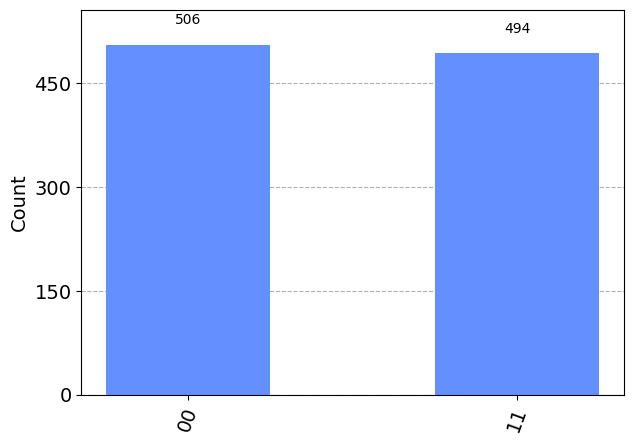

In [12]:
plot_histogram(counts)

### What does this graph demonstrate?
The only possible outcomes in our perfect simulation are 00 and 11, since our qubits are entangled. Running this code on a real quantum computer however, might show different results: through noise in the system, outcomes like 01 and 10 will also occur, although with a very small chance. 
<br>By putting $q_0$ in a superposition, it has a 50/50 chance to collapse into either 0 or 1 upon measurement, hence the fairly equal distribution between 00 and 11.

## Drawing the circuit

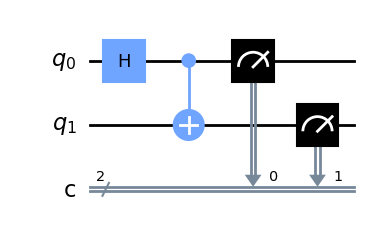

In [13]:
%matplotlib inline
circuit.draw(output='mpl')